In [ ]:
# imports
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_US = df[df['job_country'] == 'United States']
df_skills = df_US.explode('job_skills')
df_skills[['job_title', 'job_skills']]
df_skills_count = df_skills.groupby(['job_skills',"job_title_short"])['job_title'].size().reset_index(name="skill_count")

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)



In [ ]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles =sorted(job_titles[:3])


['Data Analyst', 'Data Engineer', 'Data Scientist']

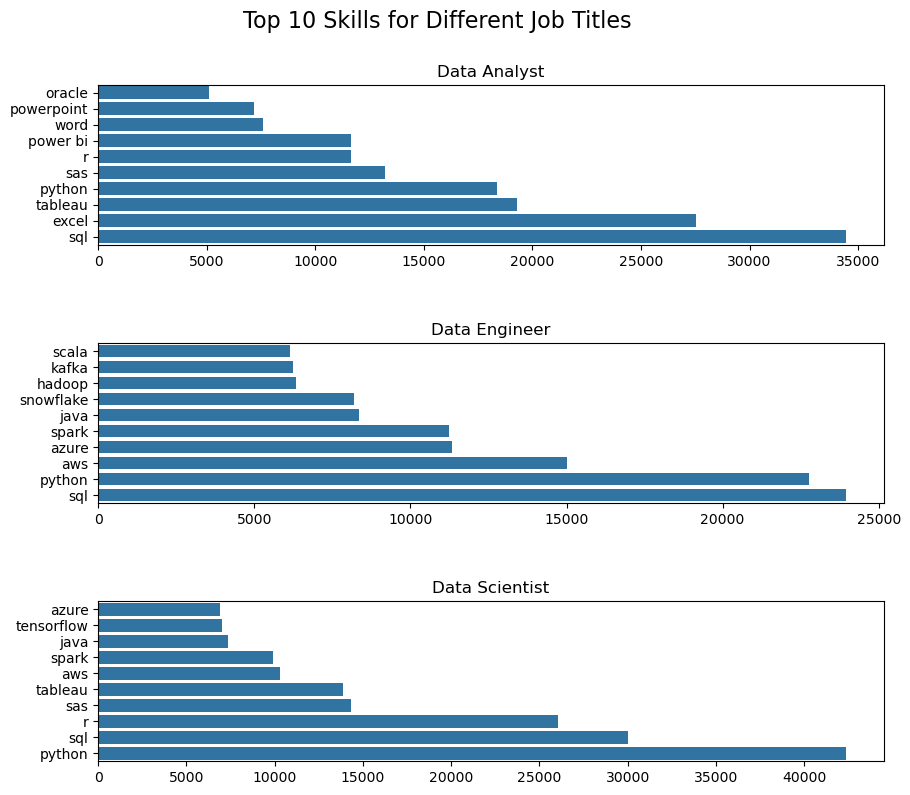

In [99]:
fig, ax = plt.subplots(len(job_titles), 1 )

for i, job in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job].head(10)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], orient='h')
    ax[i].set_title(f'{job}')
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    # ax[i].legend().set_visible(False)
    ax[i].invert_yaxis()
    # ax[i].bar_label(ax[i].containers[0])

fig.tight_layout()
fig.suptitle('Top 10 Skills for Different Job Titles', y=1.02, fontsize=16)
fig.set_size_inches(10, 8)
plt.show()

In [63]:
df_job_count = df_US['job_title_short'].value_counts().reset_index(name='job_total')

In [77]:
df_skills_perc = pd.merge(df_skills_count, df_job_count, how='left', on='job_title_short')
df_skills_perc['skill_percentage'] = df_skills_perc['skill_count'] / df_skills_perc['job_total'] * 100
df_skills_perc

,job_skills,job_title_short,skill_count,job_total,skill_percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


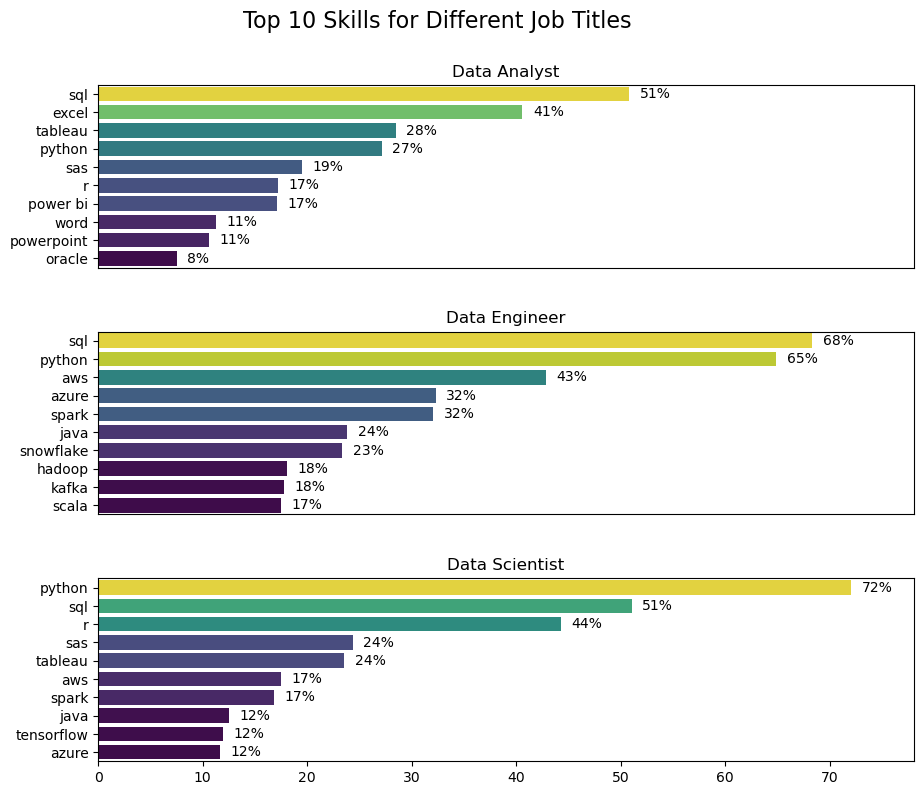

In [97]:
fig, ax = plt.subplots(len(job_titles), 1 )

for i, job in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job].head(10)
    sns.barplot(data=df_plot, x='skill_percentage', y='job_skills', ax=ax[i], orient='h', hue='skill_percentage', palette='viridis')
    ax[i].set_title(f'{job}')
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 78)
    
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v +1, n, f'{v:.0f}%', va='center')
    
    ax[i].set_xticks([]) if i != len(job_titles) - 1 else None

fig.tight_layout()
fig.suptitle('Top 10 Skills for Different Job Titles', y=1.02, fontsize=16)
fig.set_size_inches(10, 8)
plt.show()